# Series Temporales: TP1
### GONZALEZ Nehuen
### MADOERY Pablo

In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### En primer lugar cargamos los datos, seteamos la columna index como trimestres y convertimos los datos a double.

In [2]:
data = pd.read_csv('datasets/Telefonia_movil.csv')

In [3]:
data


,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
0,2013,1,8.785.943,6582117,15368060,Ene-Mar 2013
1,2013,2,9.512.689,7108640,16621329,Abr-Jun 2013
2,2013,3,10.315.484,7335154,17650638,Jul-Sept 2013
3,2013,4,9.809.515,6250549,16060064,Oct-Dic 2013
4,2014,1,10.128.751,5799223,15927974,Ene-Mar 2013
5,2014,2,10.821.463,6438071,17259534,Abr-Jun 2014
6,2014,3,11.524.344,7179152,18703495,Jul-Sept 2014
7,2014,4,11.997.330,7147630,19144961,Oct-Dic 2014
8,2015,1,10.273.637,6480172,16753809,Ene-Mar 2015
9,2015,2,11.226.576,6579819,17806395,Abr-Jun 2015


In [4]:
data.columns

Index(['Año', 'Trimestre', 'Minutos pospago salientes (miles)',
       'Minutos prepago salientes (miles)',
       'Total de minutos salientes (miles)', 'Periodo'],
      dtype='object')

Hay 6 features: Año, Trimestre, Minutos pospago salientes, Minutos prepago salientes, Total de minutos Salientes y Periodo.

El año y el trimestre están representados como enteros. Existe una incongruencia en los formatos de los minutos pospago con respecto a los prepago y totales, ya que utilizan el punto como separador de miles. Finalmente el Periodo es información redundante. 

Las filas se encuentran ordenadas de forma ascendente, así que se puede generar un índice que empiece en enero de 2013 y vaya hasta marzo de 2019 con frecuencia de 3 meses.

In [5]:
data = data.set_index(pd.date_range(start='01/01/2013', end='03/01/2019', freq='3M'))
data['Minutos pospago salientes (miles)'] = data['Minutos pospago salientes (miles)'].map(lambda x: x.replace('.',''))
data['Minutos pospago salientes (miles)'] = data['Minutos pospago salientes (miles)'].astype('double')
data['Minutos prepago salientes (miles)'] =  data['Minutos prepago salientes (miles)'].astype('double')
data['Total de minutos salientes (miles)'] =  data['Total de minutos salientes (miles)'].astype('double')


In [6]:
data["Total minutos calculados"] = data['Minutos pospago salientes (miles)'] + data['Minutos prepago salientes (miles)']
data[data["Total minutos calculados"] != data['Total de minutos salientes (miles)']]

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo,Total minutos calculados
2014-07-31,2014,3,11524344.0,7179152.0,18703495.0,Jul-Sept 2014,18703496.0
2014-10-31,2014,4,11997330.0,7147630.0,19144961.0,Oct-Dic 2014,19144960.0
2015-10-31,2015,4,11905073.0,7301039.0,19206111.0,Oct-Dic 2015,19206112.0
2016-10-31,2016,4,15960765.0,6938892.0,22899656.0,Oct-Dic 2016,22899657.0
2017-07-31,2017,3,15106275.0,6308373.0,21414647.0,Jul-Sept 2017,21414648.0


Existe una difeencia mínima entre el total reportado y  la suma de los subtotales debido probablemente a problemas de redondeo. 

In [7]:
data = data.drop(columns=["Periodo", "Total minutos calculados"])

In [8]:
data.describe()

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles)
count,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01
mean,2015.640000,2.440000,1.235930e+07,6.562909e+06,1.892220e+07
std,1.845716,1.157584,2.085582e+06,5.168604e+05,1.982378e+06
min,2013.000000,1.000000,8.785943e+06,5.380710e+06,1.536806e+07
25%,2014.000000,1.000000,1.082146e+07,6.250549e+06,1.765064e+07
50%,2016.000000,2.000000,1.190507e+07,6.579819e+06,1.900123e+07
75%,2017.000000,3.000000,1.424022e+07,7.077838e+06,2.036436e+07
max,2019.000000,4.000000,1.596076e+07,7.335154e+06,2.289966e+07


### Para cada trimestre existen 3 atributos que queremos ser capaces de analizar y predecir: Minutos prepago salientes, Minutos pospago salientes y Total de minutos salientes


In [9]:
prepago = 'Minutos prepago salientes (miles)'
pospago = 'Minutos pospago salientes (miles)'
total = 'Total de minutos salientes (miles)'

/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


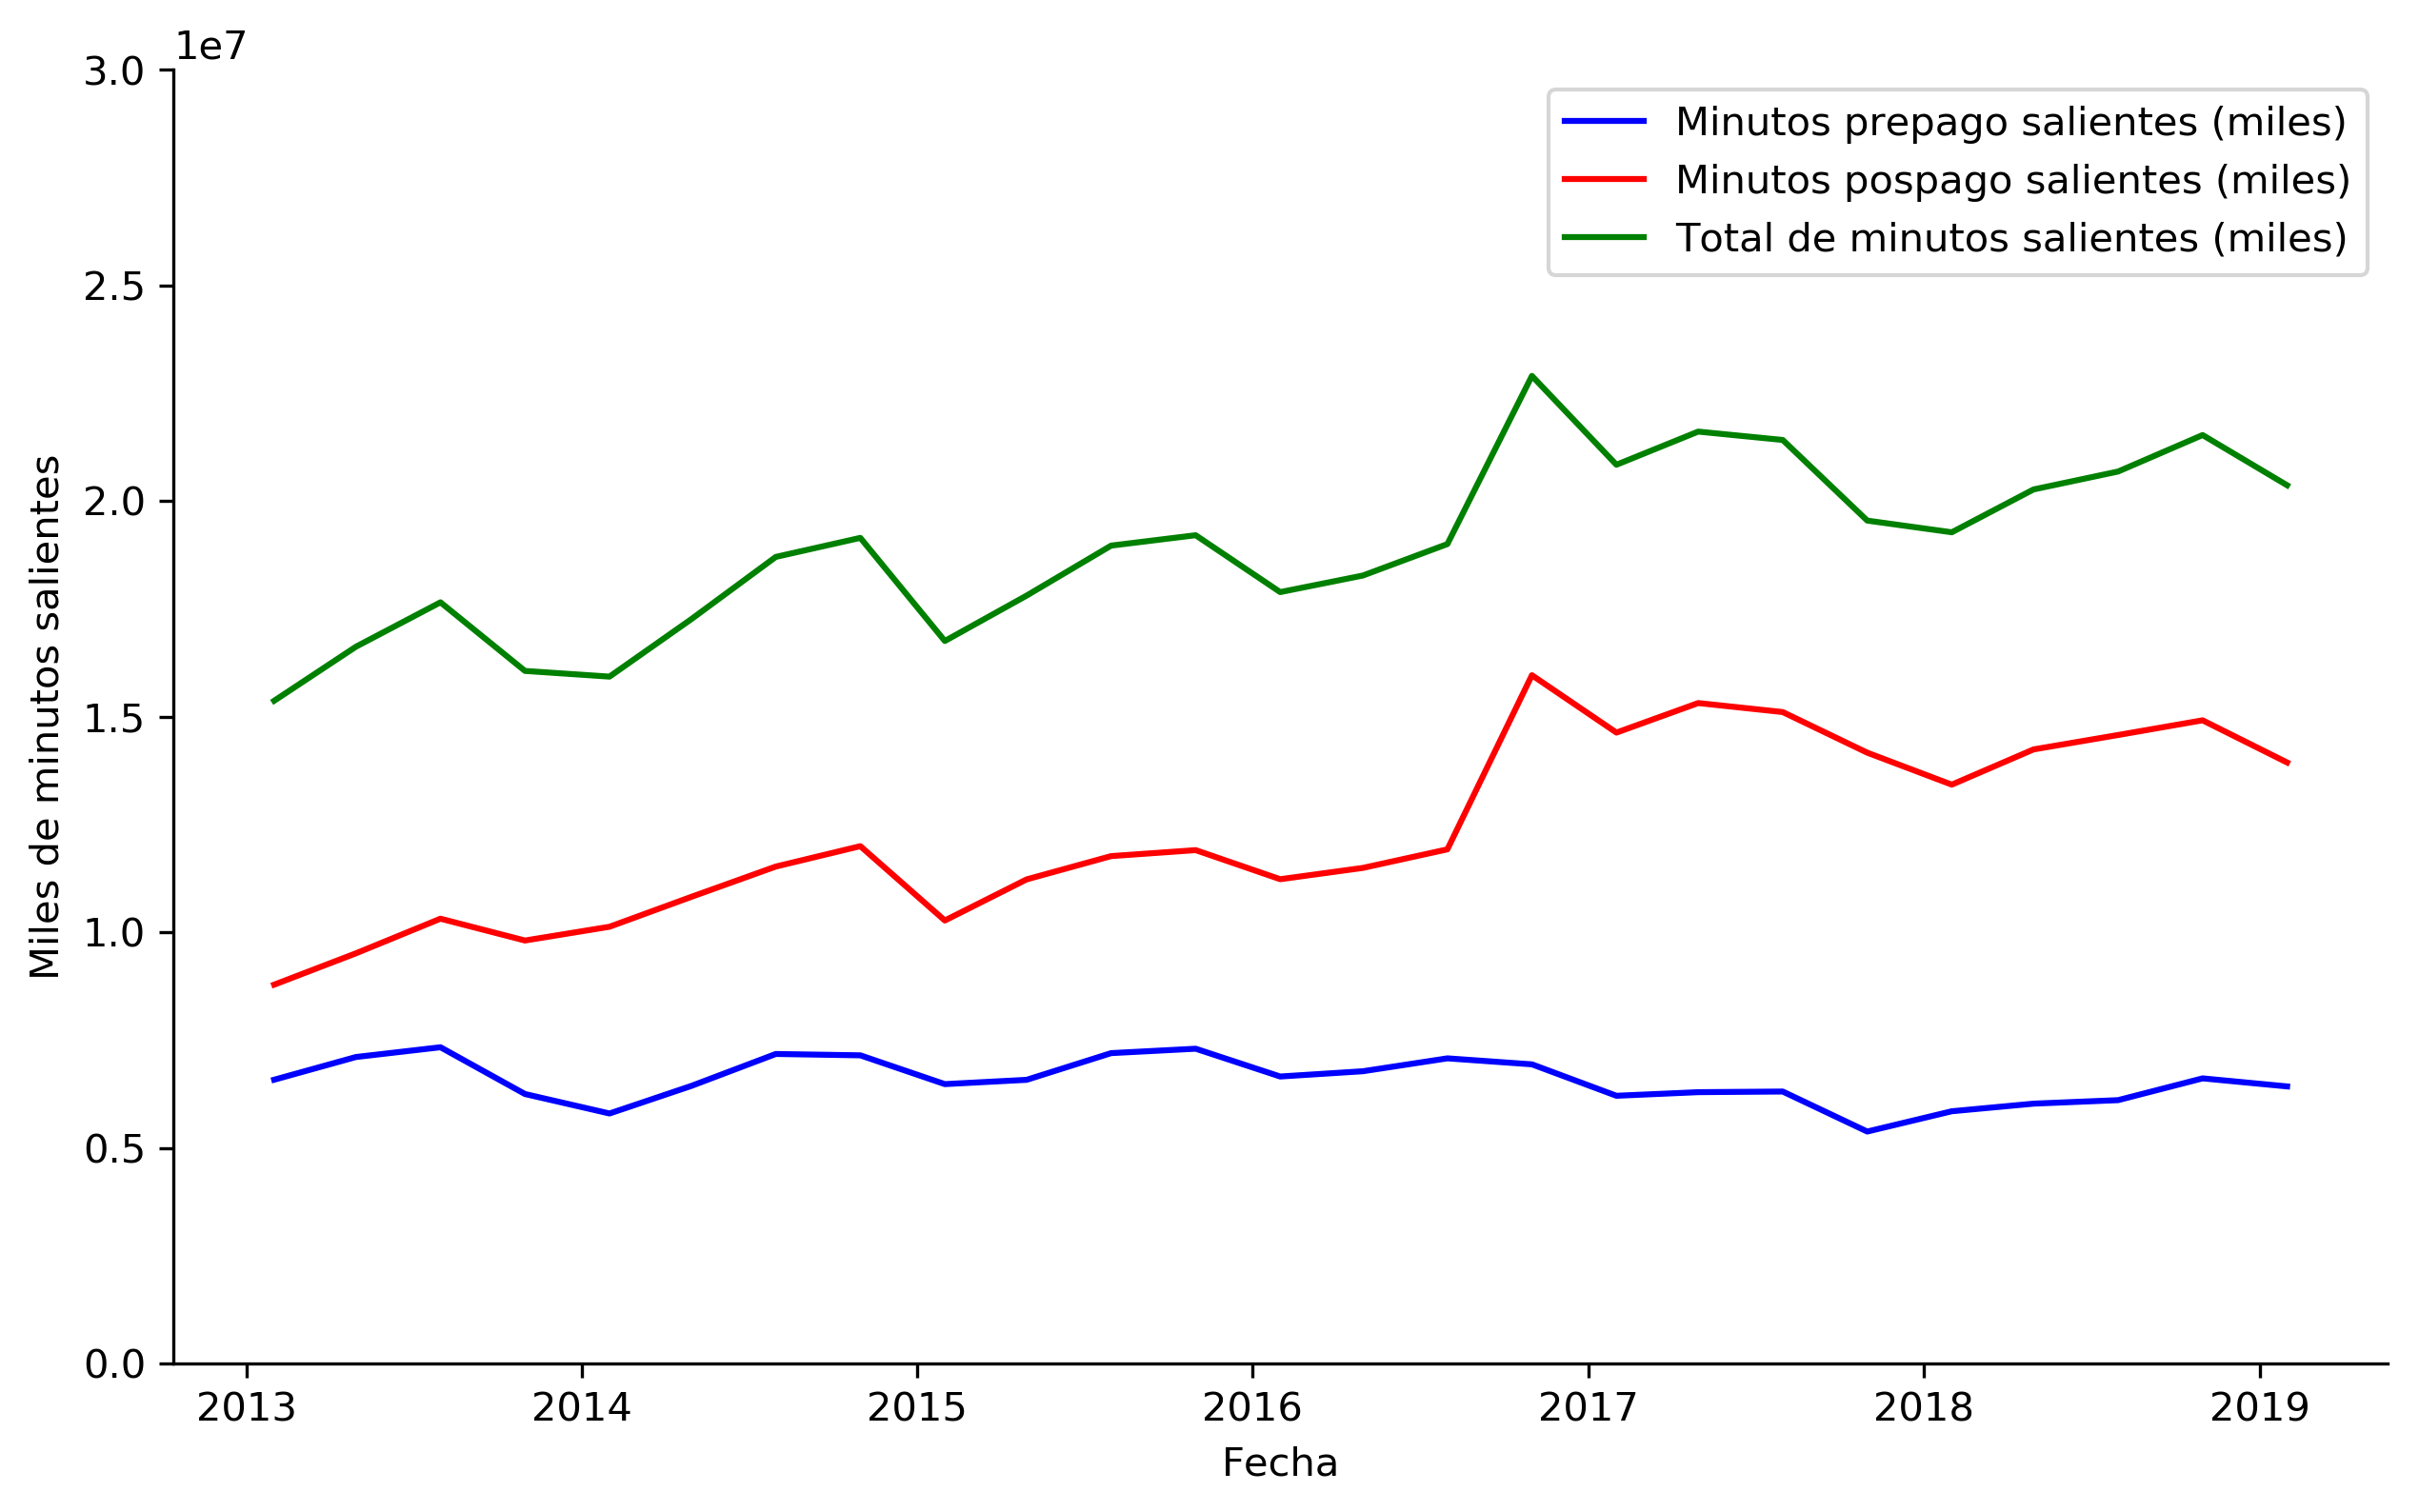

In [10]:
plt.figure(figsize=(10,6), dpi=300)
sns.lineplot(data=data[prepago], color="blue")
sns.lineplot(data=data[pospago], color="red")
sns.lineplot(data=data[total], color="green")
plt.xlabel("Fecha")
plt.ylabel("Miles de minutos salientes")
plt.ylim(0,3e7)
sns.despine()
plt.legend([prepago, pospago, total])

### Realizamos una primera exploración de modelos ExponentialSmoothing para comparar los aditivos vs los multiplicativos

In [11]:
y1 = data[prepago]

In [12]:
def hw_summary(model_sm):
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' In-sample fit:')
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return model_sm.summary()

In [13]:
m1=sm.tsa.ExponentialSmoothing(y1, 
                                       trend='add', 
                                       damped=False, 
                                       seasonal='add', 
                                       seasonal_periods=4).fit()
hw_summary(m1)

 In-sample fit:
 RMSE               498930.433


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,6223289428949.590
Optimized:,True,AIC,672.011
Trend:,Additive,BIC,681.762
Seasonal:,Additive,AICC,687.725
Seasonal Periods:,4,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:46:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3051592,alpha,True
smoothing_slope,3.3566e-16,beta,True


In [14]:
m2=sm.tsa.ExponentialSmoothing(y1, 
                                       trend='add', 
                                       damped=False, 
                                       seasonal='mul', 
                                       seasonal_periods=4).fit()
hw_summary(m2)

 In-sample fit:
 RMSE               373724.090


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,3491742393469.614
Optimized:,True,AIC,657.564
Trend:,Additive,BIC,667.315
Seasonal:,Multiplicative,AICC,673.278
Seasonal Periods:,4,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:46:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999999,alpha,True
smoothing_slope,4.6105e-13,beta,True


In [15]:
m3=sm.tsa.ExponentialSmoothing(y1, 
                                       trend='add', 
                                       damped=True, 
                                       seasonal='mul', 
                                       seasonal_periods=4).fit()
hw_summary(m3)

 In-sample fit:
 RMSE               373716.844


/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,3491606989661.379
Optimized:,True,AIC,659.563
Trend:,Additive,BIC,670.533
Seasonal:,Multiplicative,AICC,679.870
Seasonal Periods:,4,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:46:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.0560094,beta,True


### Observamos que el modelo multiplicativo tiene una mejor performance

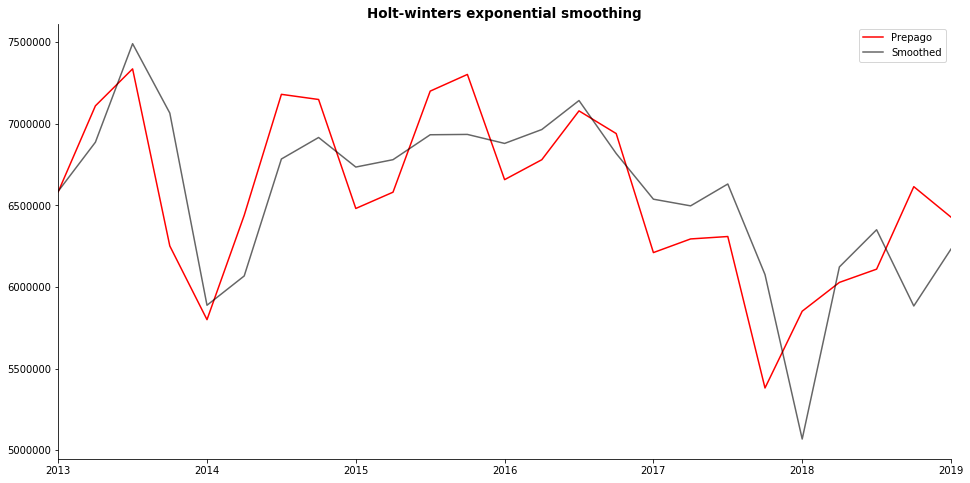

In [16]:
smoothed=pd.Series(m3.fittedvalues, index=data.index)
fig, ax= plt.subplots(figsize=(16,8))
data[prepago].plot(color='red', label='Prepago')
smoothed.plot(color='black', label='Smoothed', alpha=0.6)
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title('Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.legend()
plt.show()

### Pasamos ahora a analizar los minutos Pospago

In [17]:
y2 = data[pospago]

In [18]:
m1=sm.tsa.ExponentialSmoothing(y2, 
                                       trend='add', 
                                       damped=False, 
                                       seasonal='add', 
                                       seasonal_periods=4).fit()
hw_summary(m1)

 In-sample fit:
 RMSE               882591.729


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,19474204010735.582
Optimized:,True,AIC,700.531
Trend:,Additive,BIC,710.282
Seasonal:,Additive,AICC,716.245
Seasonal Periods:,4,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:46:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8674287,alpha,True
smoothing_slope,3.9801e-06,beta,True


In [19]:
m2=sm.tsa.ExponentialSmoothing(y2, 
                                       trend='add', 
                                       damped=False, 
                                       seasonal='mul', 
                                       seasonal_periods=4).fit()
hw_summary(m2)

 In-sample fit:
 RMSE               868227.161


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,18845460098361.395
Optimized:,True,AIC,699.710
Trend:,Additive,BIC,709.461
Seasonal:,Multiplicative,AICC,715.425
Seasonal Periods:,4,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:46:11
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9070403,alpha,True
smoothing_slope,1.1743e-10,beta,True


In [20]:
m3=sm.tsa.ExponentialSmoothing(y2, 
                                       trend='add', 
                                       damped=True, 
                                       seasonal='mul', 
                                       seasonal_periods=4).fit()
hw_summary(m3)

 In-sample fit:
 RMSE               863605.503


Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,18645361601403.613
Optimized:,True,AIC,701.444
Trend:,Additive,BIC,712.413
Seasonal:,Multiplicative,AICC,721.751
Seasonal Periods:,4,Date:,"Sun, 06 Oct 2019"
Box-Cox:,False,Time:,21:46:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8867794,alpha,True
smoothing_slope,4.5912e-13,beta,True


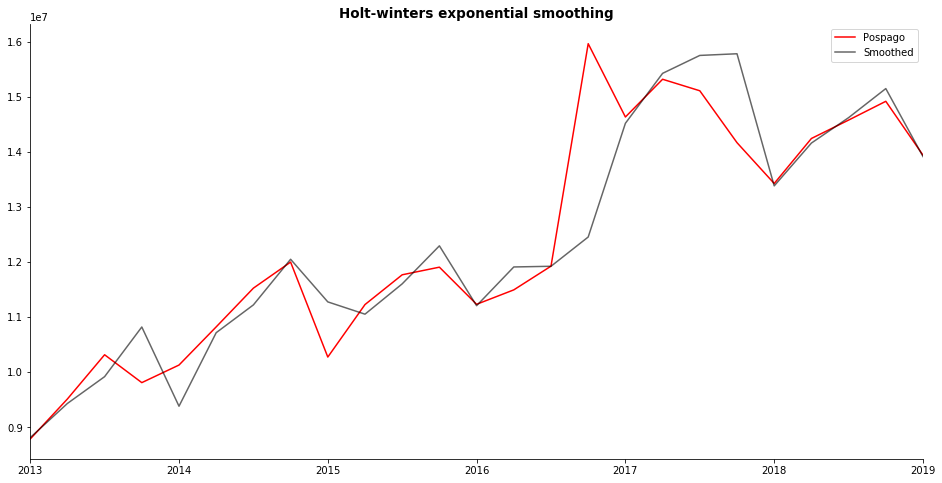

In [21]:
smoothed=pd.Series(m3.fittedvalues, index=data.index)
fig, ax= plt.subplots(figsize=(16,8))
data[pospago].plot(color='red', label='Pospago')
smoothed.plot(color='black', label='Smoothed', alpha=0.6)
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title('Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.legend()
plt.show()

### A continuación realizamos una comparación entre estos modelos con un Seasonal Random Walk: 

In [ ]:
actual= []
pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
pred4 = []
indices = []

for i in range(8, len(y1)):
    
    indices.append(y1.index[i])
    
    actual.append(y1.iloc[i]) 
    
    pred1.append(y1.iloc[i-4]) 
    
    mod2 = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=4).fit()
    pred2.append(mod2.forecast(1)[0]) 
    
    mod3 = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=4).fit()
    pred3.append(mod3.forecast(1)[0]) 
    
    mod4 = sm.tsa.ExponentialSmoothing(y1.iloc[:i], trend='add', damped=True, seasonal='mul', seasonal_periods=4).fit()
    pred4.append(mod4.forecast(1)[0]) 

/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/mado

In [ ]:
columns=['seasonal random walk', 'additive holt winters', 'multiplicative holt winters', "damped multiplicative holt winters", 'Actual']
results = np.vstack([pred1,pred2,pred3,pred4,actual]).T
results = pd.DataFrame(results, columns=columns, index=indices)


In [ ]:
fig, ax= plt.subplots(figsize=(16,8))
results.plot(ax = ax, title='Comparación de modelos')

In [ ]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

### Podemos observar que el mejor modelo para el caso de los minutos salientes de prepago es el multiplicative holt winters que supera tanto al additive holt winters como al seasonal random walk

 ---

In [ ]:
actual= []
pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
pred4 = []
indices = []

for i in range(8, len(y1)):
    
    indices.append(y2.index[i])
    
    actual.append(y2.iloc[i]) 
    
    pred1.append(y2.iloc[i-4]) 
    
    mod2 = sm.tsa.ExponentialSmoothing(y2.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=4).fit()
    pred2.append(mod2.forecast(1)[0]) 
    
    mod3 = sm.tsa.ExponentialSmoothing(y2.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=4).fit()
    pred3.append(mod3.forecast(1)[0]) 
    
    mod4 = sm.tsa.ExponentialSmoothing(y2.iloc[:i], trend='add', damped=True, seasonal='mul', seasonal_periods=4).fit()
    pred4.append(mod4.forecast(1)[0]) 
    
    

In [ ]:
columns=['seasonal random walk', 'additive holt winters', 'multiplicative holt winters', "damped multiplicative holt winters", 'Actual']
results = np.vstack([pred1,pred2,pred3,pred4,actual]).T
results = pd.DataFrame(results, columns=columns, index=indices)


In [ ]:
fig, ax= plt.subplots(figsize=(16,8))
results.plot(ax = ax, title='Comparación de modelos')

In [ ]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

### Podemos observar que el mejor modelo para el caso de los minutos salientes de prepago es el multiplicative holt winters que supera tanto al additive holt winters como al seasonal random walk